In [2]:
#Importing libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

print("Finished importing libraries")

Finished importing libraries


In [6]:
#Loading data 

#Compose is used to combine multiple transformations
# ToTensor -> Converts PIL-image to pyTorch tensor (value between 0 and 1)
# Normalize -> Normalizes the pixel values so they are between 0 and 1. This helps the model to run more smoothly
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]
)

#Loads in the MNIST dataset and saves it in ./data
# Train -> Because we want to use training data.
# Download -> It will download the data if it isn't avaible yet.
# Transform -> Apply's the transformations we declared above.
trainset = torchvision.datasets.MNIST(
    root='./data', train=True,
    download=True, transform=transform
)
#Converts the dataset to a dataloader. This will deliver batches for training.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

#Same thing for testing data.
testset = torchvision.datasets.MNIST(
    root='./data', train=False,
    download=True, transform=transform
)

testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Selecteer een afbeelding uit de dataset (bijvoorbeeld de eerste afbeelding)
image, label = testset[101]

# Converteer de afbeelding terug naar een bruikbaar formaat
# De afbeelding is genormaliseerd, dus we moeten deze denormaliseren
image = image * 0.5 + 0.5  # Denormaliseer
image = transforms.ToPILImage()(image)  # Converteer naar PIL-afbeelding

# Sla de afbeelding op als een PNG-bestand
image.save("mnist_image.png")

print("Finished loading data")

Finished loading data


In [3]:
#Defining a pyTorch model
# We also initialise this model using the pyCharm nn.Module  

# self.fc:
# nn.Sequential -> Makes sure they everthing inside is run top to bottom
# Flatten -> Transforms 2D image into a vector. A fully connected layer expects a 1D-array
# Linear 1 -> This is a fully connected (dense) layer. The input has 784 Neurons (1 for every pixel). 
#           The output has 128 Neurons which means we get back 128 features. This will recognize important paterns.
# ReLU   -> This is complex, Will look into it later.
# Linear 2 -> This is the output layer. The input has 128 features and will return 10 neurons. One for every number 0-9

# Forward -> Sends an image through all the steps from self.fc
 
class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    
    def forward(self, x):
        return self.fc(x)

#Initialises the model. 
model = MNISTModel()

print("Finished defining the model")

Finished defining the model


In [4]:
#This defines the loss function that is used to measure how good/bad the model is operating.
# It gives a high value when the model makes a bad prediction and a low value when it makes a good prediction.
criterion = nn.CrossEntropyLoss()

#Here we decide how the model learns
# Adam -> Is a popular model optimiser, it changes the weights of the network to minimize loss.
optimizer = optim.Adam(
    model.parameters(), 
    lr=0.001
)

print("Finished defining loss function")

Finished defining loss function


In [5]:
# Training the model

#Epoch = A loop of the entire training data.
#Loss = The loss of an epoch is how bad the model is operating. The goal is to get this as low as possible
#       but not 0, because that would be overfitting the model.

#Inside the trainloader (which will run the training data in batches):
# optimizer -> Responsible for updating the mode weights. .zero_grod() makes sure it is reset to 0 at the start of every batch
# outputs = model(images) -> This feeds the images into the neural network model. 
# loss -> This compares the model predictions (the outputs) to the labels, a higher loss means the model is performing poorly
# loss.backward -> This is backpropagation, here we calculate how much weight each weight in the model is contributed to the error.
# optimizer.step -> This updates the weights of the model based on what is calculated in loss.backward.

print("Starting training")

epochs = 5 
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()         
        outputs = model(images)      
        loss = criterion(outputs, labels) 
        loss.backward()                   
        optimizer.step()               
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs} Loss: {running_loss/len(trainloader):.4f}")

print("Finished training")

Starting training
Epoch 1/5 Loss: 0.3467
Epoch 2/5 Loss: 0.1762
Epoch 3/5 Loss: 0.1307
Epoch 4/5 Loss: 0.1081
Epoch 5/5 Loss: 0.0959
Finished training


In [6]:
#Evaluate the model
#Here we are evaluating how good our model is performing, and just how accurate it is when testing.
#torch.no_grad -> Disables gradients, to speed up calculations.
#predicted -> Stores the index of the highest value, which is also the predicted digit.
#correct -> Counts how many of the predictions where correct and adds it to correct.

correct = 0
total = 0
with torch.no_grad(): 
    for images, labels in testloader:
        outputs = model(images) 
        _, predicted = torch.max(outputs, 1) 
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 96.01%


In [7]:
#Saving my trained model

model_path = "mnist_model.pth"
torch.save(model.state_dict(), model_path)

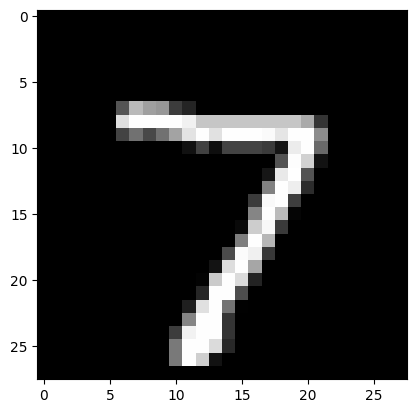

Model predicts: 7, Correct answer: 7


In [8]:
#Using the model to predict a random number
#We pick an image out of our array of testing data and let our trained model predict the number that is on it.
# plt.imshow -> Plots the image
# .show -> Shows the image. 
# .unqsueeze -> Because our model expects a batch of images we have to make our single image into a batch. 
#               unsqueezing the image creates a batch of one image.
# model.eval -> Puts the model into evaluation mode.

sample_image, sample_label = testset[0]  
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.show()

sample_image = sample_image.unsqueeze(0) 
model.eval() 
prediction = model(sample_image)
predicted_label = torch.argmax(prediction).item()
print(f"Model predicts: {predicted_label}, Correct answer: {sample_label}")
